# Business Understanding

As the holiday season is approaching large retail sellers are beginning to focus on what should be showcased in
their stores.  Target is looking to better understand the sentiment behind the products which they are selling in
their technology section.   doing this they will better understand which products to have higher inventory on

# Data Understanding

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
data.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

# Check Null Values

In [5]:
data.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
data.emotion_in_tweet_is_directed_at = data.emotion_in_tweet_is_directed_at.fillna(value = "NA")

In [7]:
data.tweet_text = data.tweet_text.fillna(value = "NA")

In [8]:
data.isna().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [9]:
data.drop(columns=['emotion_in_tweet_is_directed_at'], inplace = True)

# Clean Columns

## is_there_an_emotion_directed_at_a_brand_or_product

In [10]:
data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [11]:
data['is_there_an_emotion_directed_at_a_brand_or_product'] = data.is_there_an_emotion_directed_at_a_brand_or_product.map({"Negative emotion": 0, "I can't tell": 1, "No emotion toward brand or product": 1, "Positive emotion": 2})

In [12]:
data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

1    5545
2    2978
0     570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [13]:
data.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

   is_there_an_emotion_directed_at_a_brand_or_product  
0                                                  0   
1                                                  2   
2                                                  2   
3                                                  0   
4                                                  2

# Word Clouds EDA

In [43]:
Positive = " ".join(review for review in data[data["is_there_an_emotion_directed_at_a_brand_or_product"]==2]['tweet_text'])
Negative = " ".join(review for review in data[data["is_there_an_emotion_directed_at_a_brand_or_product"]==0]['tweet_text'])
Neutral = " ".join(review for review in data[data["is_there_an_emotion_directed_at_a_brand_or_product"]==1]['tweet_text'])

## Positive

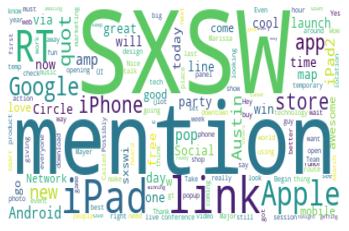

In [39]:
from wordcloud import WordCloud

wordcloud_positive = WordCloud(collocations=False,background_color="white", max_words=150).generate(Positive)

# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

## Negative

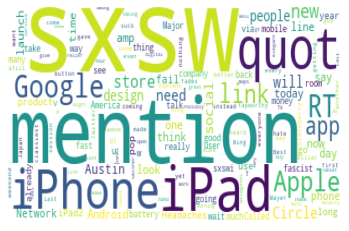

In [40]:
wordcloud_negative = WordCloud(collocations=False,background_color="white", max_words=150).generate(Negative)

# Display the generated image:
plt.imshow(wordcloud_negative, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

## Neutral

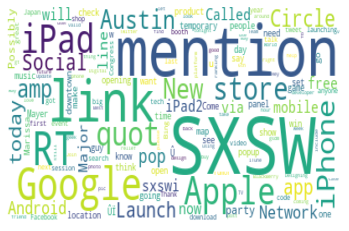

In [44]:
wordcloud_neutral = WordCloud(collocations=False,background_color="white", max_words=150).generate(Neutral)

# Display the generated image:
plt.imshow(wordcloud_neutral, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop("is_there_an_emotion_directed_at_a_brand_or_product", axis = 1)
y = data["is_there_an_emotion_directed_at_a_brand_or_product"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

# Standardizing One

In [15]:
import nltk
nltk.download('wordnet')


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


X_train['tweet_text']=X_train['tweet_text'].map(lambda s:preprocess(s))
X_test['tweet_text']=X_test['tweet_text'].map(lambda s:preprocess(s))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henryvangorp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-15-37abe8c391c6>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['tweet_text']=X_train['tweet_text'].map(lambda s:preprocess(s))
<ipython-input-15-37abe8c391c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['tweet_text']=X_test['tweet_text'].map(lambda s:preprocess(s))


In [16]:
X_train.iloc[100]["tweet_text"]

'google hotpot demo sxsw seems whole lot like yelp innovate left outa game show heat maps link'

# Tokenizer

In [17]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

In [18]:
X_train["text_tokenized"] = X_train["tweet_text"].apply(tokenizer.tokenize)
X_test["text_tokenized"] = X_test["tweet_text"].apply(tokenizer.tokenize)

<ipython-input-18-980beecedbf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text_tokenized"] = X_train["tweet_text"].apply(tokenizer.tokenize)
<ipython-input-18-980beecedbf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["text_tokenized"] = X_test["tweet_text"].apply(tokenizer.tokenize)


In [19]:
X_train.iloc[100]["text_tokenized"][:20]

['google',
 'hotpot',
 'demo',
 'sxsw',
 'seems',
 'whole',
 'lot',
 'like',
 'yelp',
 'innovate',
 'left',
 'outa',
 'game',
 'show',
 'heat',
 'maps',
 'link']

## Exploratory Data Analysis: Frequency Distributions

In [20]:
from nltk import FreqDist

example_freq_dist = FreqDist(X_train.iloc[100]["text_tokenized"][:20])
example_freq_dist

FreqDist({'google': 1, 'hotpot': 1, 'demo': 1, 'sxsw': 1, 'seems': 1, 'whole': 1, 'lot': 1, 'like': 1, 'yelp': 1, 'innovate': 1, ...})

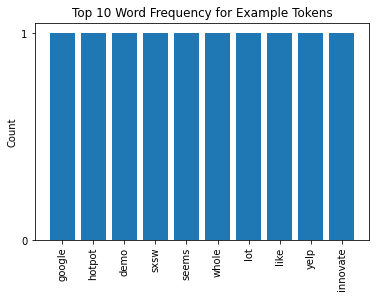

In [21]:
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")

## Visualizing the Frequency Distribution for the Full Dataset

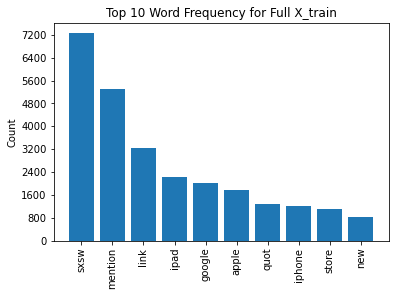

In [22]:
train_freq_dist = FreqDist(X_train["text_tokenized"].explode())

# Plot the top 10 tokens
visualize_top_10(train_freq_dist, "Top 10 Word Frequency for Full X_train")

# Baseline Model with TfidVectorizer and MultinomialNB

## TfidfVectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate a vectorizer with max_features=10
# (we are using the default token pattern)
tfidf = TfidfVectorizer(max_features=10)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["tweet_text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

apple    google      ipad    iphone      link   mention  new  quot  \
0     0.000000  0.000000  0.000000  0.000000  0.682299  0.621914  0.0   0.0   
1     0.000000  0.000000  0.909382  0.000000  0.000000  0.000000  0.0   0.0   
2     0.000000  0.770674  0.000000  0.000000  0.000000  0.542083  0.0   0.0   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.850686  0.0   0.0   
4     0.000000  0.000000  0.000000  0.724876  0.470022  0.428424  0.0   0.0   
...        ...       ...       ...       ...       ...       ...  ...   ...   
6814  0.000000  0.000000  0.000000  0.821245  0.000000  0.485381  0.0   0.0   
6815  0.000000  0.000000  0.000000  0.628614  0.000000  0.743059  0.0   0.0   
6816  0.000000  0.000000  0.754388  0.000000  0.000000  0.558415  0.0   0.0   
6817  0.484047  0.000000  0.432509  0.000000  0.351238  0.320152  0.0   0.0   
6818  0.000000  0.000000  0.000000  0.000000  0.723548  0.659512  0.0   0.0   

         store      sxsw  
0     0.000000  0.384306  
1     0.000000  0.415963  
2     0.000000  0.334975  
3     0.000000  0.525674  
4     0.000000  0.264740  
...        ...       ...  
6814  0.000000  0.299936  
6815  0.000000  0.229583  
6816  0.000000  0.345067  
6817  0.560027  0.197835  
6818  0.000000  0.203770  

[6819 rows x 10 columns]

In [24]:
assert X_train_vectorized.shape[0] == X_train.shape[0]

# The vectorized version should have 10 columns, since we set
# max_features=10
assert X_train_vectorized.shape[1] == 10

## MultinomialNB

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.60997067, 0.60997067, 0.60997067, 0.60923754, 0.60968452])

In [26]:
y_train.value_counts(normalize=True)

1    0.609767
2    0.327467
0    0.062766
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

In [56]:
from sklearn.metrics import classification_report

baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

ValueError: could not convert string to float: 'mention building custom android home screen sxsw sxswi stuff must haves link'

In [ ]:
print(classification_report(y_test, y_pred_rf2a))

# Second Model with Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_baseline_model = RandomForestClassifier()

rf_baseline = -cross_val_score(rf_baseline_model, X_train, y_train, scoring="is_there_an_emotion_directed_at_a_brand_or_product").mean()
rf_baseline_log_loss

ValueError: 'is_there_an_emotion_directed_at_a_brand_or_product' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.